In [54]:
%pylab inline
from classy import Class
from scipy.interpolate import interp1d

Populating the interactive namespace from numpy and matplotlib


In [2]:
release_path = '/global/cfs/projectdirs/act/data/act_dr4/'

In [3]:
chain = np.loadtxt(release_path+'cosmo_results/actpollite_likeprods_dr4.01/WMAP_1.txt')
chain = np.vstack((chain,np.loadtxt(release_path+'cosmo_results/actpollite_likeprods_dr4.01/WMAP_2.txt')))
chain = np.vstack((chain,np.loadtxt(release_path+'cosmo_results/actpollite_likeprods_dr4.01/WMAP_3.txt')))
chain = np.vstack((chain,np.loadtxt(release_path+'cosmo_results/actpollite_likeprods_dr4.01/WMAP_4.txt')))

In [4]:
chisq = 2*chain[:,1]
chisq_min = np.min(chisq)
idx = np.where(chisq==chisq_min)[0][0]
print(idx)

11634


In [5]:
delta_chi = (chisq - (chisq*0.+chisq_min)).T

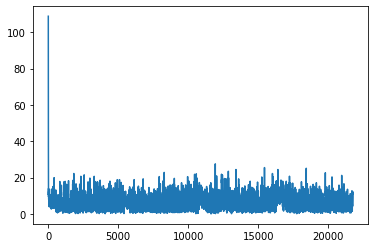

In [6]:
plt.plot(delta_chi)

In [7]:
mask = (delta_chi>10.4)&(delta_chi<11.6)

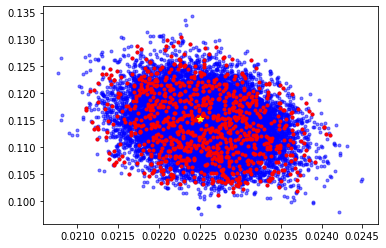

In [8]:
a = 2
b = 3
plt.plot(chain[:,a],chain[:,b],'.', color='blue', alpha=0.5)
plt.plot(chain[mask,a],chain[mask,b],'.', color='red');
plt.plot(chain[idx,a],chain[idx,b],'*', color='yellow');

In [9]:
H0_min = np.min(chain[mask,9])
H0_max = np.max(chain[mask,9])
print(H0_min,H0_max)

62.68311 76.07666


In [10]:
idx_min = np.where(chain[:,9]==H0_min)[0][0]
idx_max = np.where(chain[:,9]==H0_max)[0][0]

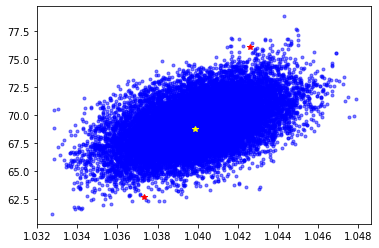

In [11]:
a = 4
b = 9
plt.plot(chain[:,a],chain[:,b],'.', color='blue', alpha=0.5)
plt.plot(chain[idx,a],chain[idx,b],'*', color='yellow');
plt.plot(chain[idx_min,a],chain[idx_min,b],'*', color='red');
plt.plot(chain[idx_max,a],chain[idx_max,b],'*', color='red');

In [12]:
#Model H0 min:
print(chain[idx_min,:])
#Model H0 max:
print(chain[idx_max,:])

[1.000000e+00 2.817062e+03 2.172938e-02 1.288869e-01 1.037325e+00
 5.285418e-02 3.059303e+00 9.401675e-01 5.236415e-01 6.268311e+01
 6.150298e-01 3.849702e-01 1.512614e-01 6.451439e-04 9.481533e-02
 8.352829e-01 5.182593e-01 6.579462e-01 1.055014e+00 2.616557e+00
 7.807922e+00 2.131269e+00 1.917475e+00 1.285364e+03 5.701637e+03
 2.531669e+03 8.054486e+02 2.269079e+02 9.401675e-01 2.451004e-01
 2.464259e-01 2.716173e+00 1.400189e+01 1.091530e+03 1.426744e+02
 1.037568e+00 1.375084e+01 1.059093e+03 1.455053e+02 1.420251e-01
 1.608627e-01 3.599323e+03 1.098529e-02 7.755954e-01 4.299985e-01
 6.794179e-02 9.095279e+01 1.456376e+03 6.936946e-01 5.012759e-01
 6.049559e-01 5.633468e+03 6.556484e-01]
[8.000000e+00 2.817266e+03 2.369308e-02 1.018160e-01 1.042588e+00
 7.433607e-02 3.031450e+00 9.979137e-01 1.994711e+00 7.607666e+01
 7.820289e-01 2.179711e-01 1.261542e-01 6.451439e-04 9.597390e-02
 7.397090e-01 3.453507e-01 5.054295e-01 8.480768e-01 2.173412e+00
 8.909607e+00 2.072726e+00 1.786383

In [26]:
common_settings_lowH0 = {#Outputs of interest
                       'output':'tCl,pCl,lCl',
                       'lensing':'yes',
                       # LambdaCDM parameters
                       'ln10^{10}A_s':3.059303e+00,
                       'n_s':9.401675e-01,
                       'k_pivot':0.05,
                       'omega_b':2.172938e-02,
                       'omega_cdm':1.288869e-01,
                       'h':6.268311e-01,                              
                       'tau_reio':5.285418e-02,
                       'YHe':'BBN',
                       # other output and precision parameters
                       'l_max_scalars':5000}

In [27]:
common_settings_highH0 = {#Outputs of interest
                       'output':'tCl,pCl,lCl',
                       'lensing':'yes',
                       # LambdaCDM parameters
                       'ln10^{10}A_s':3.031450e+00,
                       'n_s':9.979137e-01,
                       'k_pivot':0.05,
                       'omega_b':2.369308e-02,
                       'omega_cdm':1.018160e-01,
                       'h':7.607666e-01,                              
                       'tau_reio':7.433607e-02,
                       'YHe':'BBN',
                       # other output and precision parameters
                       'l_max_scalars':5000}

In [28]:
M = Class()

In [29]:
M.struct_cleanup()  # clean output
M.empty()           # clean input
M.set(common_settings_lowH0)
M.compute()
cls_lowH0 = M.lensed_cl(5000)

In [30]:
M.struct_cleanup()  # clean output
M.empty()           # clean input
M.set(common_settings_highH0)
M.compute()
cls_highH0 = M.lensed_cl(5000)

In [31]:
ell = cls_lowH0['ell']
factor = ((M.T_cmb()*1e6)**2.)*ell*(ell+1.)/2./math.pi

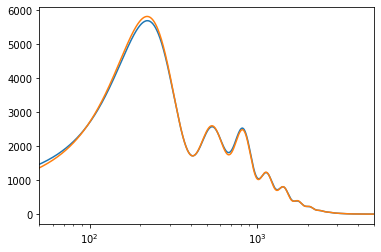

In [34]:
plt.plot(ell, factor*cls_lowH0['tt'])
plt.plot(ell, factor*cls_highH0['tt'])
plt.xlim(50,5000)
plt.xscale('log')

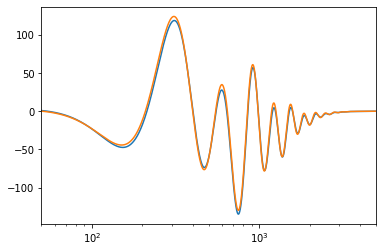

In [35]:
plt.plot(ell, factor*cls_lowH0['te'])
plt.plot(ell, factor*cls_highH0['te'])
plt.xlim(50,5000)
plt.xscale('log')

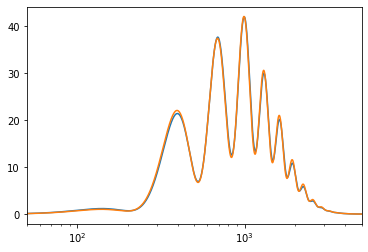

In [36]:
plt.plot(ell, factor*cls_lowH0['ee'])
plt.plot(ell, factor*cls_highH0['ee'])
plt.xlim(50,5000)
plt.xscale('log')

In [48]:
act_tt = np.loadtxt(release_path+'/spectra/cmbonly_spectra_dr4.01/act_dr4.01_D_ell_TT_cmbonly.txt')
act_te = np.loadtxt(release_path+'/spectra/cmbonly_spectra_dr4.01/act_dr4.01_D_ell_TE_cmbonly.txt')
act_ee = np.loadtxt(release_path+'/spectra/cmbonly_spectra_dr4.01/act_dr4.01_D_ell_EE_cmbonly.txt')

In [49]:
planck_tt = np.loadtxt('planck_tt.txt')
planck_tt[:,1] *= planck_tt[:,0]*(planck_tt[:,0]+1.)/2./np.pi
planck_tt[:,2] *= planck_tt[:,0]*(planck_tt[:,0]+1.)/2./np.pi
planck_te = np.loadtxt('planck_te.txt')
planck_te[:,1] *= planck_te[:,0]*(planck_te[:,0]+1.)/2./np.pi
planck_te[:,2] *= planck_te[:,0]*(planck_te[:,0]+1.)/2./np.pi
planck_ee = np.loadtxt('planck_ee.txt') 
planck_ee[:,1] *= planck_ee[:,0]*(planck_ee[:,0]+1.)/2./np.pi
planck_ee[:,2] *= planck_ee[:,0]*(planck_ee[:,0]+1.)/2./np.pi

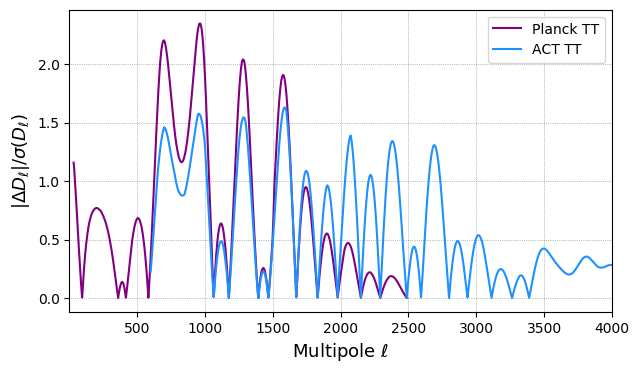

In [89]:
plt.figure(figsize=(7,4),dpi=100)

f_p = interp1d(planck_tt[:,0], planck_tt[:,2])
f_a = interp1d(act_tt[:,0], act_tt[:,2])

p_mask = (ell<np.max(planck_tt[:,0]))&(ell>np.min(planck_tt[:,0]))
plt.plot(ell[p_mask], np.abs(factor*(cls_highH0['tt']-cls_lowH0['tt']))[p_mask]/f_p(ell[p_mask]), color='purple', label="Planck TT")

a_mask = (ell<np.max(act_tt[:,0]))&(ell>np.min(act_tt[:,0]))
plt.plot(ell[a_mask], np.abs(factor*(cls_highH0['tt']-cls_lowH0['tt']))[a_mask]/f_a(ell[a_mask]), color='dodgerblue', label="ACT TT")

plt.grid(color='grey', linestyle=':', linewidth=0.5, which='major')
plt.xlim(2,4000)
plt.xlabel(r'Multipole $\ell$', size=13)
plt.ylabel(r'|$\Delta D_{\ell}$|/$\sigma(D_{\ell})$', size=13)
plt.legend()
plt.savefig('constrain_TT.pdf', bbox_inches = 'tight', pad_inches = 0.2,dpi=300)

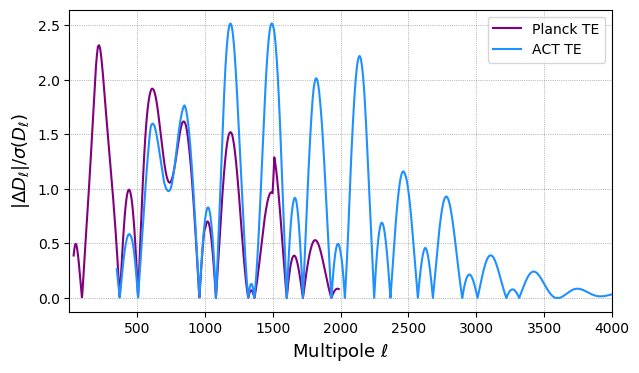

In [88]:
plt.figure(figsize=(7,4),dpi=100)

f_p = interp1d(planck_te[:,0], planck_te[:,2])
f_a = interp1d(act_te[:,0], act_te[:,2])

p_mask = (ell<np.max(planck_te[:,0]))&(ell>np.min(planck_te[:,0]))
plt.plot(ell[p_mask], np.abs(factor*(cls_highH0['te']-cls_lowH0['te']))[p_mask]/f_p(ell[p_mask]), color='purple', label="Planck TE")

a_mask = (ell<np.max(act_te[:,0]))&(ell>np.min(act_te[:,0]))
plt.plot(ell[a_mask], np.abs(factor*(cls_highH0['te']-cls_lowH0['te']))[a_mask]/f_a(ell[a_mask]), color='dodgerblue', label="ACT TE")

plt.grid(color='grey', linestyle=':', linewidth=0.5, which='major')
plt.xlim(2,4000)
plt.xlabel(r'Multipole $\ell$', size=13)
plt.ylabel(r'|$\Delta D_{\ell}$|/$\sigma(D_{\ell})$', size=13)
plt.legend()
plt.savefig('constrain_TE.pdf', bbox_inches = 'tight', pad_inches = 0.2,dpi=300)

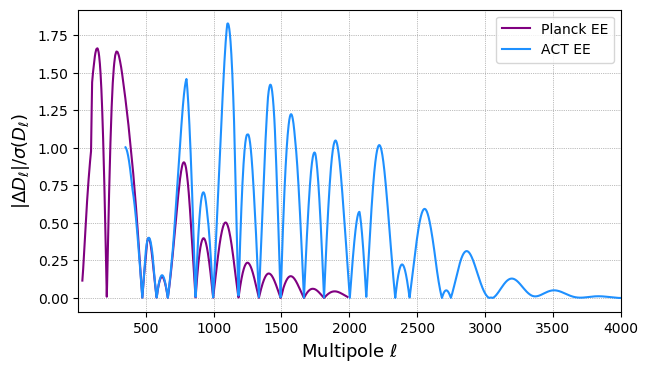

In [87]:
plt.figure(figsize=(7,4),dpi=100)

f_p = interp1d(planck_ee[:,0], planck_ee[:,2])
f_a = interp1d(act_ee[:,0], act_ee[:,2])

p_mask = (ell<np.max(planck_ee[:,0]))&(ell>np.min(planck_ee[:,0]))
plt.plot(ell[p_mask], np.abs(factor*(cls_highH0['ee']-cls_lowH0['ee']))[p_mask]/f_p(ell[p_mask]), color='purple', label="Planck EE")

a_mask = (ell<np.max(act_ee[:,0]))&(ell>np.min(act_ee[:,0]))
plt.plot(ell[a_mask], np.abs(factor*(cls_highH0['ee']-cls_lowH0['ee']))[a_mask]/f_a(ell[a_mask]), color='dodgerblue', label="ACT EE")

plt.grid(color='grey', linestyle=':', linewidth=0.5, which='major')
plt.xlim(2,4000)
plt.xlabel(r'Multipole $\ell$', size=13)
plt.ylabel(r'|$\Delta D_{\ell}$|/$\sigma(D_{\ell})$', size=13)
plt.legend()
plt.savefig('constrain_EE.pdf', bbox_inches = 'tight', pad_inches = 0.2,dpi=300)